# Linear Regression model

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'datasets/growth/data.csv'

data = pd.read_csv(data_path)

In [6]:
print(data)

              x           y
0      0.370370    6.562245
1      1.481481    8.618909
2      2.962963   11.153123
3      2.222222   10.277819
4      3.333333   12.074243
5      3.703704   12.930698
6      2.962963   11.439622
7      4.444444   13.914884
8      4.814815   14.490519
9      3.703704   12.786811
10     5.185185   15.488058
11     5.555556   16.061966
12     5.185185   15.321312
13     7.037037   18.689967
14     7.037037   18.823678
15     6.296296   17.413302
16     6.296296   17.320295
17     8.518519   21.616918
18     8.148148   20.524585
19     7.777778   19.997120
20     9.629630   23.601799
21     8.888889   22.161491
22    10.000000   24.262780
23    10.740741   25.402612
24     9.259259   22.558211
25    10.740741   25.270942
26    10.000000   24.158678
27    10.370370   24.606149
28    11.111111   26.278621
29    11.851852   27.328458
..          ...         ...
470  175.925926  322.591173
471  176.666667  324.260961
472  175.555556  321.878128
473  175.925926  322

In [14]:
data.describe()

,x,y
count,500.000000,500.000000
mean,93.717778,174.736519
std,53.527855,96.344740
min,0.370370,6.562245
25%,47.777778,91.888080
50%,94.444444,175.871186
75%,139.444444,257.010400
max,186.666667,342.267697


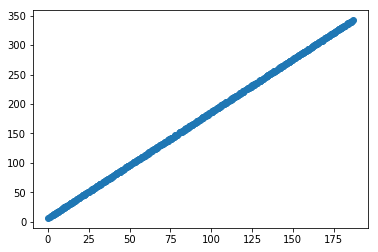

In [15]:
%matplotlib inline
plt.scatter(data['x'], data['y'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff578629668>,
      dtype=object)

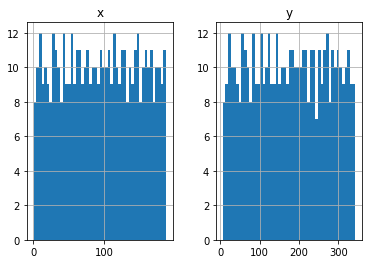

In [16]:
data.hist(bins=50)

In [17]:
data.corr()

,x,y
x,1.000000,0.999999
y,0.999999,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5784b5f28>,
      dtype=object)

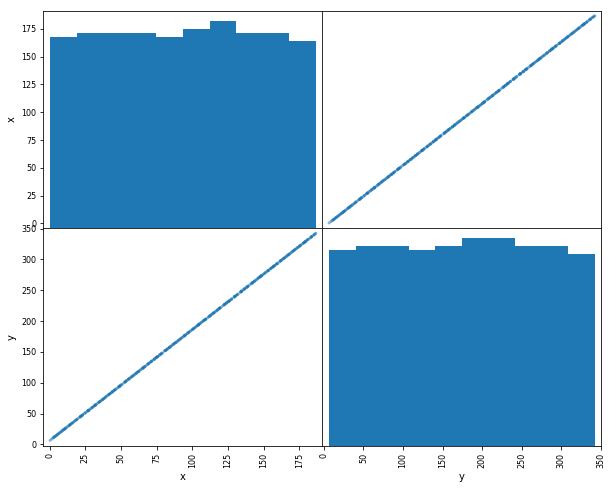

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(10,8))

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['x'], data['y'], test_size=0.25, random_state=42)

In [49]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [52]:
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

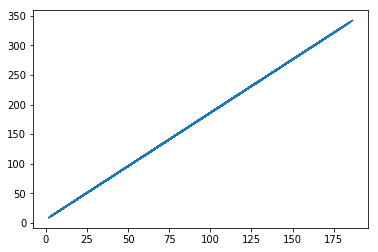

In [50]:
plt.plot(X_train, y_train)
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
lin_reg.coef_

array([[1.80001629]])

In [58]:
prediction = lin_reg.predict(X_test)
prediction

array([[248.71791327],
       [ 58.71619371],
       [256.05131297],
       [110.04999163],
       [ 76.71635662],
       [272.71813048],
       [261.38469457],
       [ 90.04981062],
       [ 54.71615751],
       [308.05178359],
       [ 12.7157774 ],
       [138.05024504],
       [278.05151208],
       [ 62.71622991],
       [255.38464027],
       [265.38473077],
       [340.0520732 ],
       [ 26.7159041 ],
       [218.05096906],
       [280.05153018],
       [336.71870969],
       [336.71870969],
       [193.38407915],
       [247.38456787],
       [ 60.04953911],
       [316.71852869],
       [341.3854186 ],
       [150.71702634],
       [ 74.04966582],
       [229.38440496],
       [326.05194649],
       [234.05111386],
       [300.71838388],
       [124.71679103],
       [ 11.382432  ],
       [232.05109576],
       [282.05154828],
       [ 54.71615751],
       [147.38366284],
       [ 50.71612131],
       [264.05138537],
       [ 70.04962962],
       [333.38534619],
       [131

In [59]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(prediction, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_mse

0.022197567380983628

In [72]:
prediction[:5]

array([[248.71791327],
       [ 58.71619371],
       [256.05131297],
       [110.04999163],
       [ 76.71635662]])

In [76]:
y_test[:5]

array([[248.56615296],
       [ 58.73012333],
       [255.91114429],
       [110.13031725],
       [ 76.78814084]])

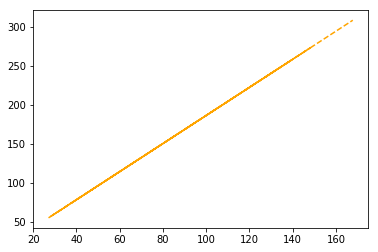

In [84]:
plt.clf()
lim = 2
#plt.plot(X_test[:lim], y_test[:lim], color='green')
plt.plot(X_test[:10], prediction[:10], color='orange', linestyle='--')
plt.show()

In [90]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(lin_mse)
forest_mse

/home/dmitry/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.6383181431200559

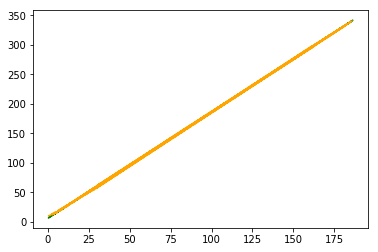

In [96]:
plt.clf()
lim = 2
plt.plot(X_test, y_test, color='green')
plt.plot(X_test, pred, color='orange', linestyle='--')
plt.show()